[View in Colaboratory](https://colab.research.google.com/github/kaushik9728/assignment_7/blob/master/assignment_8.ipynb)

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
df=pd.read_csv('https://raw.githubusercontent.com/Shreyas3108/house-price-prediction/master/kc_house_data.csv')

In [23]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [6]:
df.shape

(21613, 21)

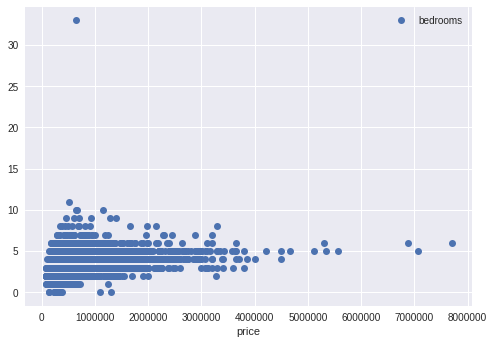

In [10]:
df.plot(x='price',y='bedrooms',style='o')

In [0]:
X=df[['bedrooms','bathrooms','sqft_living','floors','grade','sqft_lot','sqft_above','sqft_basement','yr_built','lat','long','sqft_living15','zipcode','yr_renovated','sqft_lot15']]

In [0]:
Y=df['price']

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [28]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
coef_df=pd.DataFrame(regressor.coef_,X.columns,columns=['coefficients'])
coef_df

,coefficients
bedrooms,-41089.275157
bathrooms,48289.780234
sqft_living,115.385885
floors,10782.409769
grade,102560.939640
sqft_lot,0.149199
sqft_above,59.300023
sqft_basement,56.085861
yr_built,-3270.264673
lat,550904.401319


In [0]:
Y_pred=regressor.predict(X_test)

In [32]:
compare=pd.DataFrame({'actual':Y_test,'predicted':Y_pred})
compare

,actual,predicted
10452,655000.0,6.498018e+05
14644,418900.0,4.590548e+05
18719,295000.0,4.556549e+05
12301,737000.0,6.012652e+05
5560,406430.0,3.154202e+05
17331,543500.0,5.007670e+05
15994,465000.0,4.855449e+05
8673,1090000.0,7.316151e+05
10953,279900.0,4.244278e+05
5212,195000.0,2.011329e+05
